# Метод стохастического градиента

Метод стохастичесткого градиента (метод стохастического градиентного спуска, stochastic gradient descent (SGD)) — оптимизированный по скорости сходимости метод градиентного спуска.

Отличием от традиционного градиентного метода является то, что элементы рассматриваются по отдельности, в некотором случайном порядке или в порядке их получения.

Таким образом, градиент функции стоимости будет вычисляться не для всех элементов в выборке, как это делается при традиционном методе градиентного спуска, а для каждого элемента в отдельности. Градиент, вычисленный для конкретного элемента, принимается как приближение реального градиента. Веса в модели пересчитываются в соотвествии с вычисленным градиентом для одного элемента, что приводит к тому, что модель корректируюется при переходе от каждого очередного элемента выборки к следующему.

## Алгоритм

1. Перемешиваем датасет случайным образом

2. Цикл по всем элементам выборки:
    
    2.1 Цикл по всем весам модели:
        
        2.1.1. Корректируем текущий вес в соответсвии с частной производной функции стоимости по нему


Важно понимать, что в отличие от традиционного метода градиентного спуска, данный алгоритм на каждом шаге может и не стремиться к минимуму функции стоимости, но в результате некоторого количества шагов общее направление как раз и будет стремиться к этому минимуму.

## Реализация



Точность на тестовом наборе: 0.87


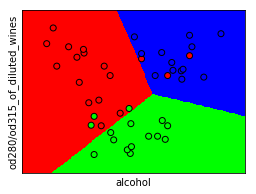

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split 

dataset = load_wine()
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], random_state=15)
μ = X_train.mean(axis=0)
σ = X_train.std(axis=0)

X_train_normalized = (X_train - μ) / σ
X_test_normalized = (X_test - μ) / σ


clf = SGDClassifier(loss="log", penalty="l1", max_iter=10000)

selection = pd.DataFrame(X_train_normalized, columns=dataset.feature_names)[['alcohol', 'od280/od315_of_diluted_wines']]

clf.fit(selection, y_train)

test_selection = pd.DataFrame(X_test_normalized, columns=dataset.feature_names)[['alcohol', 'od280/od315_of_diluted_wines']]

print("Точность на тестовом наборе: {:.2f}".format(clf.score(test_selection, y_test)))

import numpy as np
import matplotlib.pyplot as plt

X = test_selection.values
Y = y_test

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.brg)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.brg)
plt.xlabel('alcohol')
plt.ylabel('od280/od315_of_diluted_wines')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [3]:
clf = SGDClassifier(loss="log", penalty="l2", max_iter=5)

clf.fit(X_train_normalized, y_train)
print("Точность на тестовом наборе: {:.2f}".format(clf.score(X_test_normalized, y_test)))

Точность на тестовом наборе: 0.98
